**a. Import the survey data survey.csv into R, storing rows 1 through 600 as training data and rows 601 through 750 as testing data.**

In [1]:
df = read.csv("/Users/bryanrivas/Desktop/bryan/data science exercises/4/survey.csv")

# split the data
train = head(df, 600)
test = tail(df, 150)

### Run the 2-cells below if you do not have the rpart and/or rpart.plot packages

In [ ]:
install.packages("rpart")

In [ ]:
install.packages("rpart.plot")

**b. Build a classification tree from the training data using the “rpart” package, according to the formula “MYDEPV ~ Price + Income + Age”. Use the information gain splitting index. Which features were actually used to construct the tree? (see the “printcp” function) Plot the tree using the “rpart.plot” package.**


In [2]:
library(rpart)
library(rpart.plot)

tree <- rpart(as.factor(MYDEPV) ~ Price + Income + Age, data = train, method = "class", parms = list(split="information"))

In [3]:
printcp(tree)


Classification tree:
rpart(formula = as.factor(MYDEPV) ~ Price + Income + Age, data = train, 
    method = "class", parms = list(split = "information"))

Variables actually used in tree construction:
[1] Age    Income Price 

Root node error: 260/600 = 0.43333

n= 600 

        CP nsplit rel error  xerror     xstd
1 0.692308      0   1.00000 1.00000 0.046685
2 0.025000      1   0.30769 0.31154 0.032194
3 0.011538      3   0.25769 0.25769 0.029672
4 0.010256      5   0.23462 0.25769 0.029672
5 0.010000     11   0.17308 0.26538 0.030055


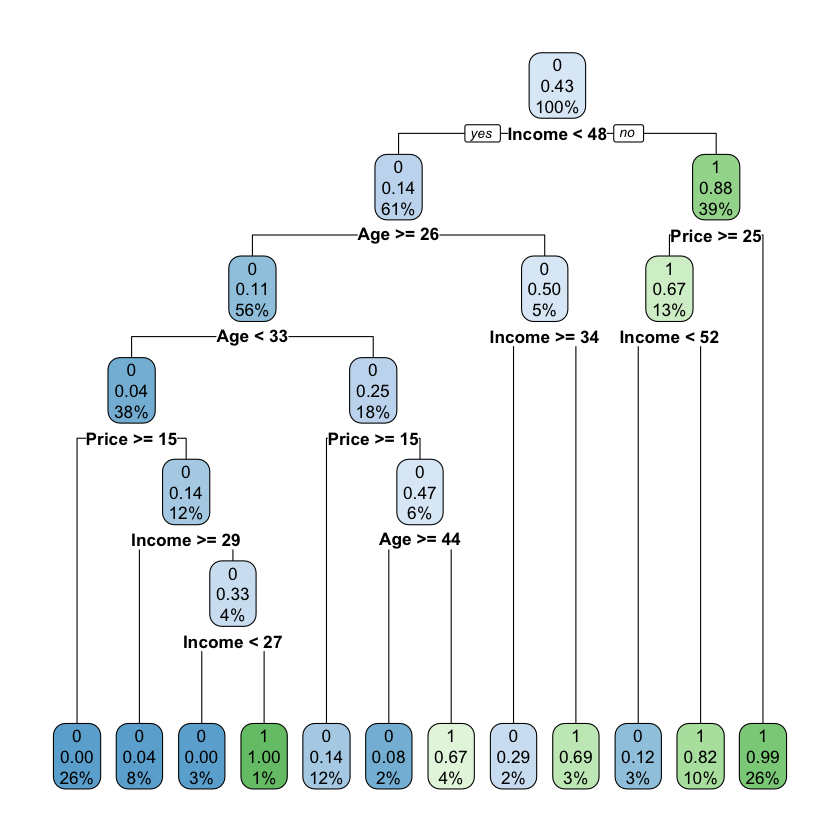

In [4]:
rpart.plot(tree)

**c. Score the model with the training data and create the model’s confusion matrix. Which class of MYDEPV was the model better able to classify?**

### Run the cell below if you do not have the caret library for the confusion matrix

In [ ]:
install.packages("caret")

In [5]:
library(caret)
pred <- predict(tree, train, type='class')
matrix <- confusionMatrix(pred, as.factor(train$MYDEPV))
matrix

Loading required package: ggplot2

Loading required package: lattice



Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 314  19
         1  26 241
                                          
               Accuracy : 0.925           
                 95% CI : (0.9009, 0.9448)
    No Information Rate : 0.5667          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8478          
                                          
 Mcnemar's Test P-Value : 0.3711          
                                          
            Sensitivity : 0.9235          
            Specificity : 0.9269          
         Pos Pred Value : 0.9429          
         Neg Pred Value : 0.9026          
             Prevalence : 0.5667          
         Detection Rate : 0.5233          
   Detection Prevalence : 0.5550          
      Balanced Accuracy : 0.9252          
                                          
       'Positive' Class : 0               
                              

for class '0' the misclassification rate was $\frac{26}{26+314} = 0.0764706$

for class '1' the misclassification rate was $\frac{19}{19+241} = 0.0730769$

The classification rate for both classes is almost identical, so we can conclude that the model performed equally as well


**d. Define the resubstitution error rate, and then calculate it using the confusion matrix from the previous step. Is it a good indicator of predictive performance? Why or why not?**

The resubstitution error rate is defined as the number of incorrect classifications divided by the total number of classifications.

$resubError = \frac{19 + 26}{19+26+241+314} = 0.075$

Our resub error is a good indicator of performance because it is based on the training data and our model should do reasonably well on the training data. However, this does not mean that the model is "good enough" we should also check the performance on the validation data

### Execute the cell bellow if you are missing the ROCR package

In [ ]:
install.packages("ROCR")

**e. Using the “ROCR” package, plot the receiver operating characteristic (ROC) curve. Calculate the area under the ROC curve (AUC). Describe the usefulness of this statistic.**

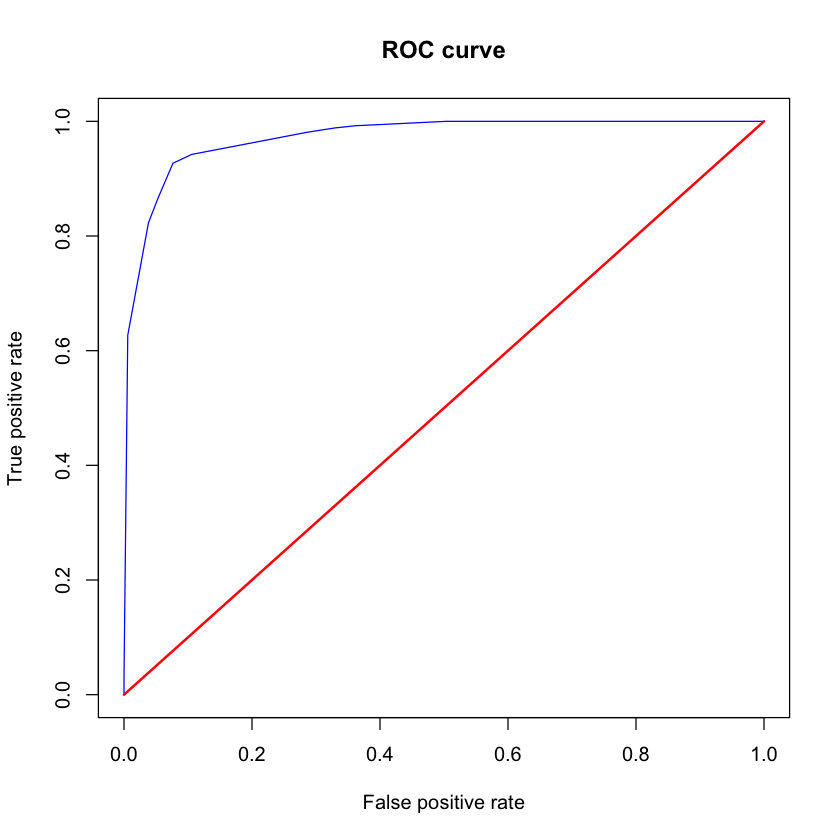

In [6]:
library(ROCR)

pred <- prediction(predict(tree, type="prob")[,2], train$MYDEPV)

#Plot ROC curve
roc <- performance(pred, "tpr", "fpr")
plot(roc, col='blue', main="ROC curve")
lines(x=c(0,1), y=c(0,1), col="red", lwd=2)

In [7]:
# Calculate AUC (area under the curve)

auc <- performance(pred, "auc")
auc@y.values

[[1]]
[1] 0.9720645

The calue of the AuC tells us the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.

For our decision tree we have that:
- The ROC curve is non-decreasing
- The ROC curve is in the form of two connected line segments

**f. Score the model with the testing data. How accurate are the tree’s predictions?**

In [8]:
pred <- predict(tree, test, type = 'class')
matrix <- confusionMatrix(pred, as.factor(test$MYDEPV))
matrix

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 76  6
         1 10 58
                                          
               Accuracy : 0.8933          
                 95% CI : (0.8326, 0.9378)
    No Information Rate : 0.5733          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7837          
                                          
 Mcnemar's Test P-Value : 0.4533          
                                          
            Sensitivity : 0.8837          
            Specificity : 0.9062          
         Pos Pred Value : 0.9268          
         Neg Pred Value : 0.8529          
             Prevalence : 0.5733          
         Detection Rate : 0.5067          
   Detection Prevalence : 0.5467          
      Balanced Accuracy : 0.8950          
                                          
       'Positive' Class : 0               
                                    

for class '0' the misclassification rate was $\frac{10}{76+10} = 0.1162791$

for class '1' the misclassification rate was $\frac{6}{6+58} = 0.09375$

- Our model performed very well for both classes
- since the difference is minimal and we have a low amount of testing data, we can conclude that each class was classified equally well or bad


**g. Repeat part (b), but set the splitting index to the Gini coefficient splitting index. How does the new tree compare to the previous one?**

In [9]:
gini_tree <- rpart(as.factor(MYDEPV) ~ Price + Income + Age, data = train, method = "class", parms = list(split='gini'))

In [10]:
printcp(gini_tree)


Classification tree:
rpart(formula = as.factor(MYDEPV) ~ Price + Income + Age, data = train, 
    method = "class", parms = list(split = "gini"))

Variables actually used in tree construction:
[1] Age    Income Price 

Root node error: 260/600 = 0.43333

n= 600 

        CP nsplit rel error  xerror     xstd
1 0.692308      0   1.00000 1.00000 0.046685
2 0.025000      1   0.30769 0.31154 0.032194
3 0.011538      3   0.25769 0.27692 0.030615
4 0.010256      5   0.23462 0.28462 0.030978
5 0.010000     11   0.17308 0.27308 0.030430


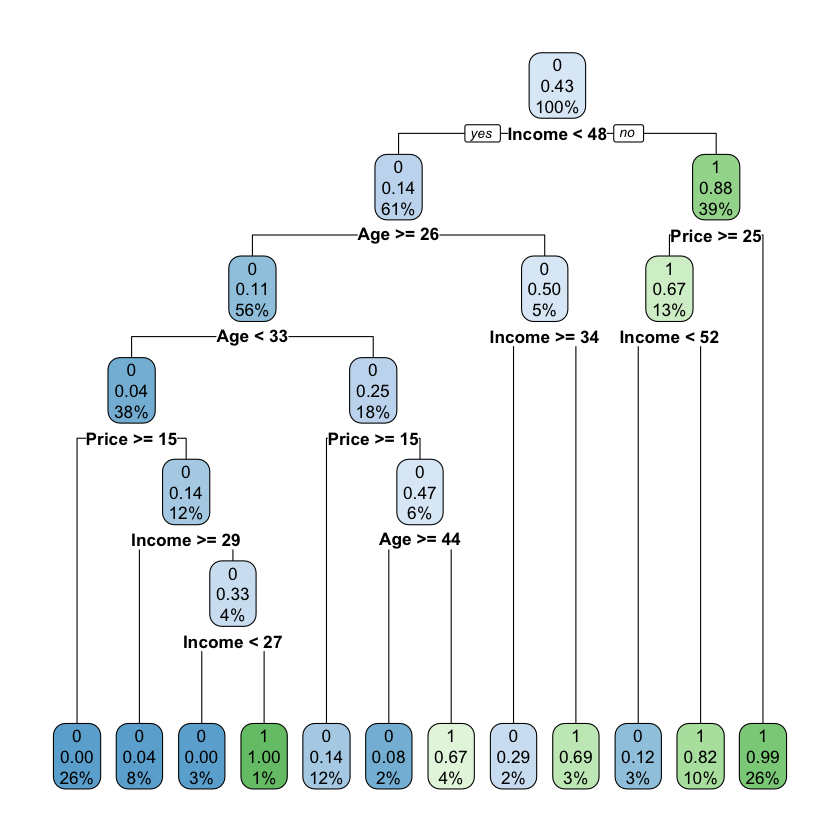

In [11]:
rpart.plot(gini_tree)

We obtained the same model even though we chose a different splitting index. This is not generally the case

**h. Pruning is a technique that reduces the size/depth of a decision tree by removing sections with low classification power, which helps reduce overfitting and simplifies the model, reducing the computational cost. One way to prune a tree is according to the complexity parameter associated with the smallest cross-validation error. Prune the new tree in this way using the “prune” function. Which features were actually used in the pruned tree? Why were certain variables not used?**

Based on our previous result, we can see tat the smallest cross-validation error is when cp = 0.011538

In [12]:
pruned_tree <- prune(tree, cp=0.011538)
printcp(pruned_tree)


Classification tree:
rpart(formula = as.factor(MYDEPV) ~ Price + Income + Age, data = train, 
    method = "class", parms = list(split = "information"))

Variables actually used in tree construction:
[1] Age    Income Price 

Root node error: 260/600 = 0.43333

n= 600 

        CP nsplit rel error  xerror     xstd
1 0.692308      0   1.00000 1.00000 0.046685
2 0.025000      1   0.30769 0.31154 0.032194
3 0.011538      3   0.25769 0.25769 0.029672
4 0.011538      5   0.23462 0.25769 0.029672


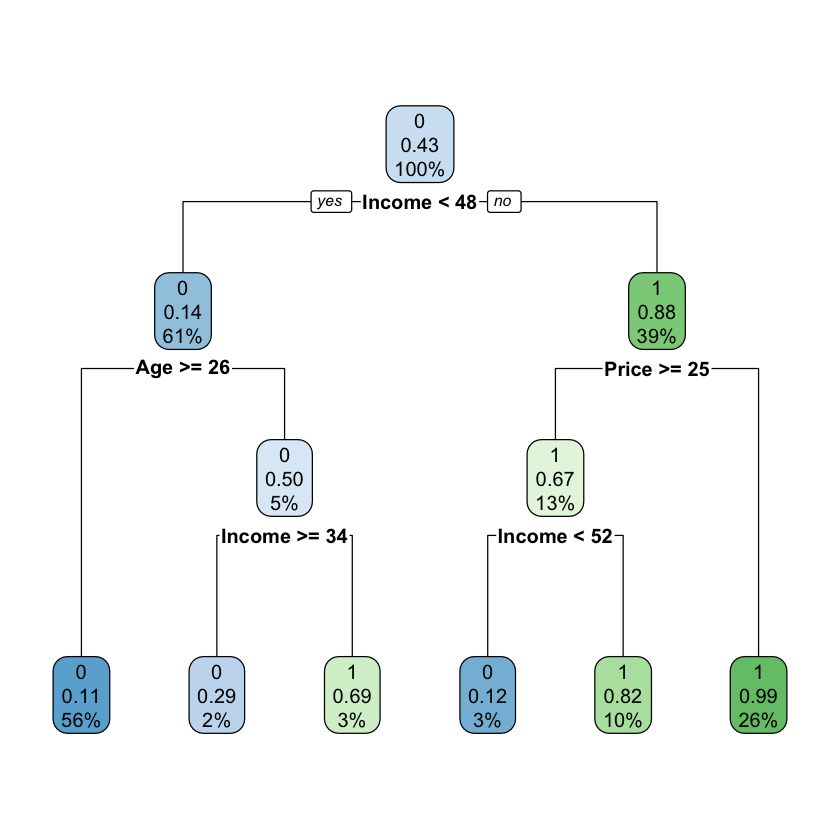

In [15]:
rpart.plot(pruned_tree)

The features that were actually used to construct the tree were:
 - Age
 - Price
 - Income
 
The variables that were not use were ignored because of the way we prunned the tree

**i. Create the confusion matrix for the new model, and compare the performance of the model before and after pruning.**

In [16]:
pred <- predict(pruned_tree, train, type = 'class')
matrix <- confusionMatrix(pred, as.factor(train$MYDEPV))
matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 322  43
         1  18 217
                                          
               Accuracy : 0.8983          
                 95% CI : (0.8713, 0.9213)
    No Information Rate : 0.5667          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7906          
                                          
 Mcnemar's Test P-Value : 0.00212         
                                          
            Sensitivity : 0.9471          
            Specificity : 0.8346          
         Pos Pred Value : 0.8822          
         Neg Pred Value : 0.9234          
             Prevalence : 0.5667          
         Detection Rate : 0.5367          
   Detection Prevalence : 0.6083          
      Balanced Accuracy : 0.8908          
                                          
       'Positive' Class : 0               
                              

Overall missclassification error = $\frac{18+43}{600} = 0.1016667$

class '1' missclassification error = $\frac{43}{43+217} = 0.1653846$

class '0' missclassification error = $\frac{18}{322+18} = 0.0529412$

The performance of our model is slightly lower